<a href="https://colab.research.google.com/github/srj3777/AI-Model/blob/main/Clustering_RealData_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Lec18/dataset.csv', encoding='ISO-8859-1')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Lec18/dataset.csv'

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df = df.dropna(subset=['CustomerID'])

In [ ]:
df = df[df['Quantity'] > 0]

In [ ]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
top_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
top_products

,Revenue
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.60
REGENCY CAKESTAND 3 TIER,142592.95
WHITE HANGING HEART T-LIGHT HOLDER,100448.15
JUMBO BAG RED RETROSPOT,85220.78
MEDIUM CERAMIC TOP STORAGE JAR,81416.73
POSTAGE,77803.96
PARTY BUNTING,68844.33
ASSORTED COLOUR BIRD ORNAMENT,56580.34
Manual,53779.93


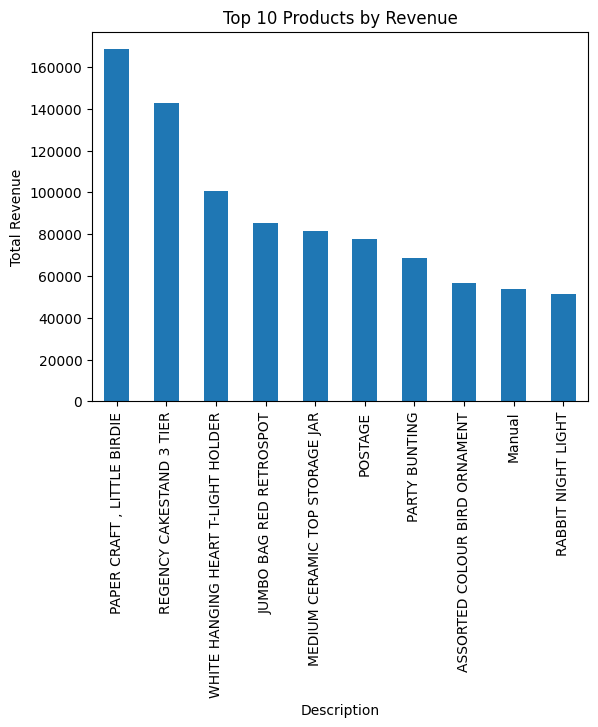

In [ ]:
import matplotlib.pyplot as plt

top_products.plot(kind='bar')
plt.title('Top 10 Products by Revenue')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

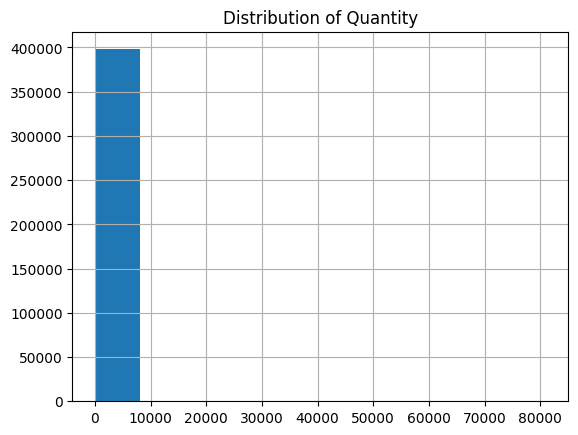

In [ ]:
df['Quantity'].hist()
plt.title("Distribution of Quantity")
plt.show()

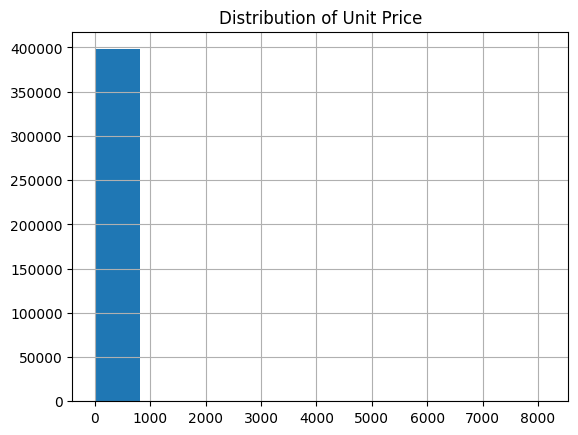

In [ ]:
df['UnitPrice'].hist()
plt.title("Distribution of Unit Price")
plt.show()

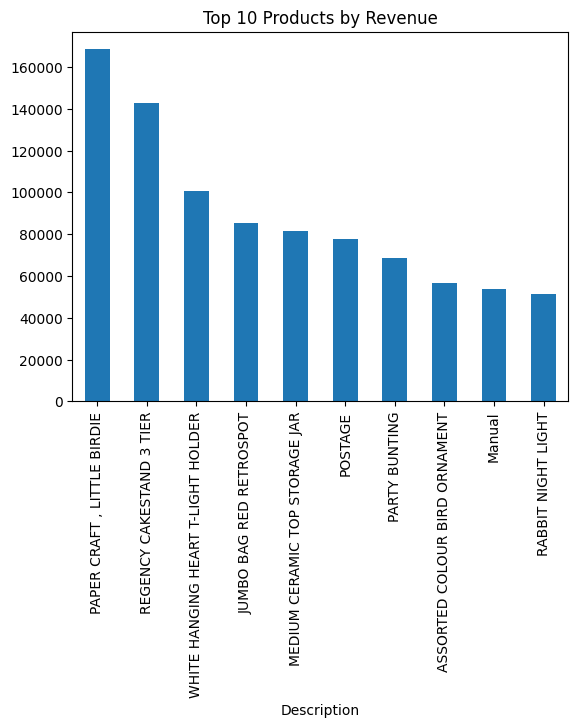

In [ ]:
df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Products by Revenue")
plt.show()

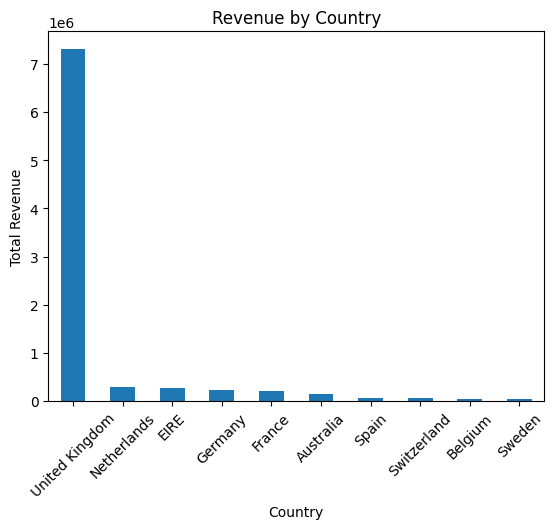

In [ ]:
df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Revenue by Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


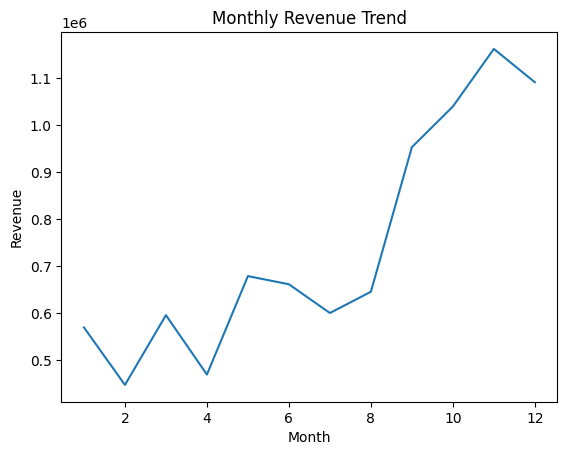

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month

df.groupby('Month')['Revenue'].sum().plot(kind='line')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

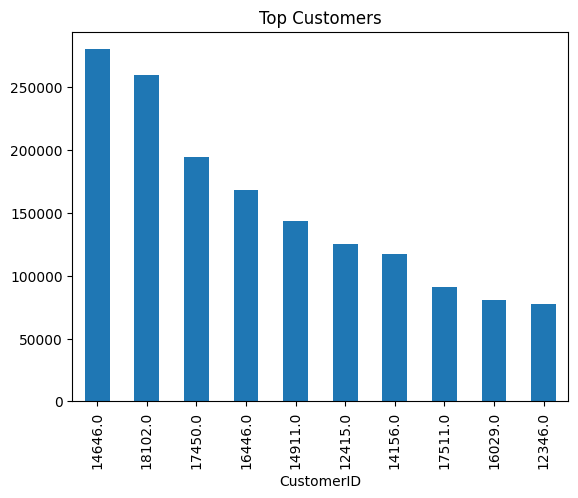

In [ ]:
df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top Customers")
plt.show()

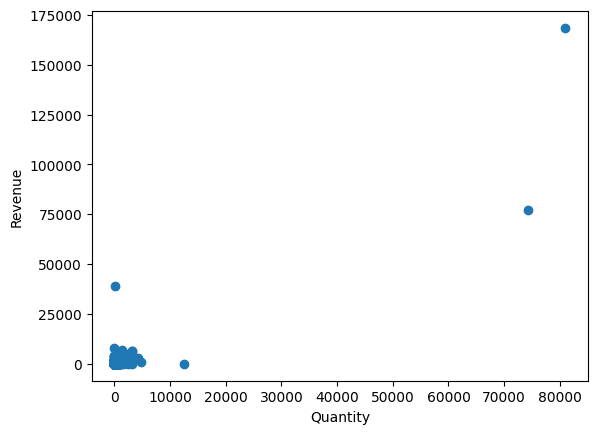

In [ ]:
plt.scatter(df['Quantity'], df['Revenue'])
plt.xlabel("Quantity")
plt.ylabel("Revenue")
plt.show()

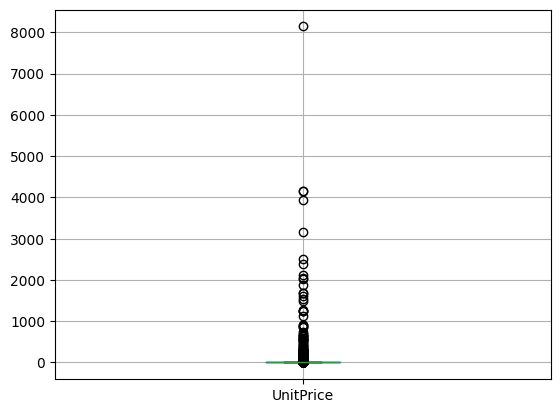

In [ ]:
df.boxplot(column='UnitPrice')
plt.show()

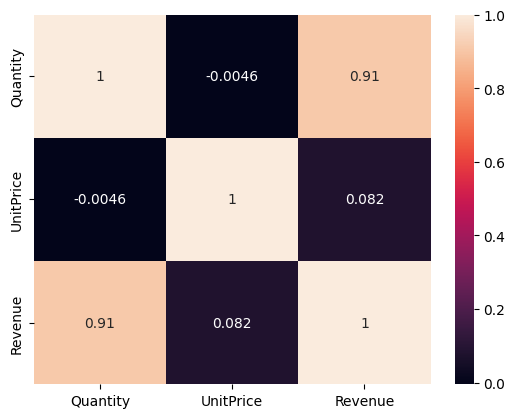

In [ ]:
import seaborn as sns
sns.heatmap(df[['Quantity','UnitPrice','Revenue']].corr(), annot=True)
plt.show()

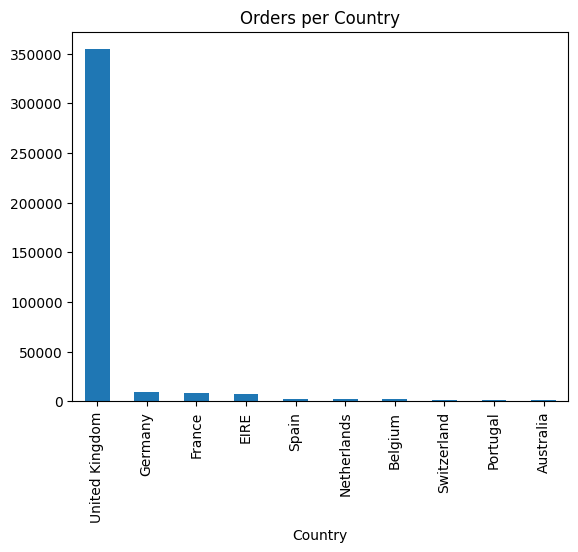

In [ ]:
df['Country'].value_counts().head(10).plot(kind='bar')
plt.title("Orders per Country")
plt.show()

In [ ]:
customer_df = df.groupby('CustomerID').agg({
    'Quantity':'sum',
    'Revenue':'sum',
    'InvoiceNo':'nunique'
}).reset_index()

customer_df.rename(columns={'InvoiceNo':'Frequency'}, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

X = customer_df[['Quantity','Revenue','Frequency']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

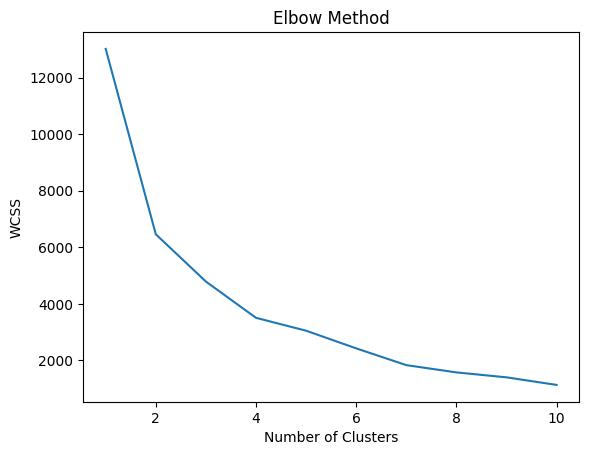

In [ ]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    print("For n_clusters =", i, "Silhouette Score is", silhouette_score(X_scaled, labels))

For n_clusters = 2 Silhouette Score is 0.9622051709983808
For n_clusters = 3 Silhouette Score is 0.9267072262780314
For n_clusters = 4 Silhouette Score is 0.7665647105528894
For n_clusters = 5 Silhouette Score is 0.6734246601887125
For n_clusters = 6 Silhouette Score is 0.672919952951402
For n_clusters = 7 Silhouette Score is 0.6727674148667963
For n_clusters = 8 Silhouette Score is 0.6497307256136973
For n_clusters = 9 Silhouette Score is 0.6498193280257021
For n_clusters = 10 Silhouette Score is 0.6500065700087415
